In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [60]:
attractors = [(np.array([0,0]),1.19999999),(np.array([0,1]),100_000_000),(np.array([4,1]),3),
        (np.array([4,4]),8)]
def ode(t,x):
    max_speed = .1
    bee_pref = 1.2
    velocity = 0
    max_attractors = [np.argmin(np.abs(np.array([bee_pref-attractors[i][1] for i in range(len(attractors))])))]
    for i in max_attractors:
        d =  attractors[i][0] - x
        G = lambda x: .1/((bee_pref-attractors[i][1])+.1)/(np.linalg.norm(d)**2 + 1)
        print(G(0))
        velocity += max_speed/(1+np.exp(-G(x)))*d/(np.linalg.norm(d) + 1)
    buzz_factor = np.array([velocity[1],-velocity[0]])
    return velocity + 1*np.sin(t/25)*(buzz_factor/(np.linalg.norm(buzz_factor)+1))

sol = solve_ivp(ode,(0,300),np.array([5,2]),max_step=.1)

0.033333330000000355
0.03398712907293335
0.03334359337925284
0.03334872659628296
0.03337441001017414
0.033378978886886526
0.033384691230070825
0.033384691229978884
0.0333949770441792
0.03340012148286974
0.03342586105367433
0.03343043992211369
0.033436164758306616
0.03343616475808429
0.033446473069772206
0.03345162876144314
0.03347742464580377
0.03348201353384545
0.0334877508979024
0.03348775089754921
0.033498081769474074
0.033503248745550475
0.03352910110063513
0.033533700036248004
0.033539449963141295
0.03353944996265675
0.03354980345777824
0.0335549817497908
0.03358089073329483
0.03358549974454159
0.0335912622693609
0.03359126226874453
0.03360163845023355
0.03360682808981887
0.03363279385996703
0.03363741297500462
0.033643188132957455
0.03364318813220879
0.03365358706344828
0.033658788082349345
0.033684810797897834
0.03368944004497779
0.03369522787138994
0.03369522787050852
0.033705649615094216
0.03371086204516082
0.0337369418653994
0.03374158127286816
0.03374738180318416
0.033747381

3002


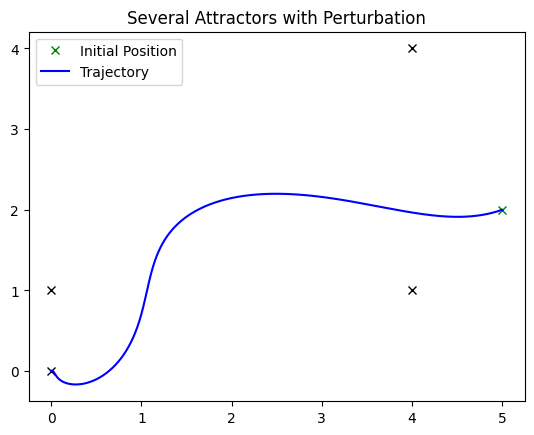

In [61]:
for attractor in attractors:
    plt.plot(attractor[0][0],attractor[0][1],'kx')
plt.plot(5,2,"gx",label="Initial Position")
print(len(sol.y[0]))
plt.plot(sol.y[0],sol.y[1],'b-',label="Trajectory")
plt.title("Several Attractors with Perturbation")
plt.legend(loc="best")
plt.savefig("several_attractors2.png",dpi=100)
